# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [74]:
# Your code here.
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Tardies'>

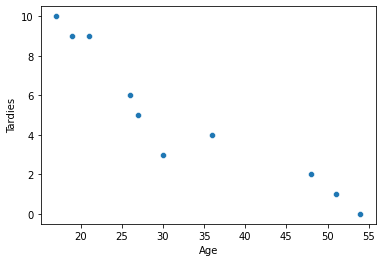

In [7]:
# Your code here.
sns.scatterplot(student_data['Age'],student_data['Tardies'])

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Your response here. 
# As per the plot, it looks that there is a correlation between the age and late to class, since it is simitar to a line

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [56]:
# Your response here.
#correlation:
student_data.corr()

#covariance:
np.cov(student_data['Age'],student_data['Tardies'])

array([[187.65555556, -45.56666667],
       [-45.56666667,  12.54444444]])

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [82]:
# Your response here.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = np.array(student_data['Age']).reshape(-1, 1)
y = student_data['Tardies']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_)
# I did a liner regressation, because the points are close to a line.

12.630883130618718


Plot your regression model on your scatter plot.

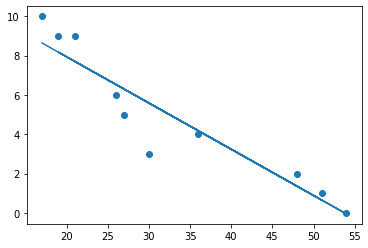

In [83]:
# Your code here.
predictions = lm.predict(X)
plt.scatter(X,y)
plt.plot(X,predictions)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# Your response here. 
# The model seems to work close to the reality, so age is a good predictor of tardiness in this class.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [87]:
# Import any libraries you may need & the data
df = pd.read_csv('vehicles.csv')
df.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

<AxesSubplot:>

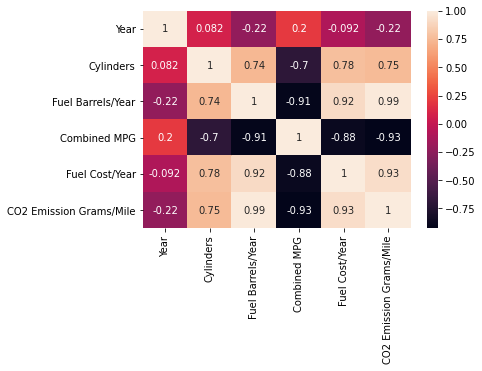

In [98]:
# Your response here. 
analysis = df[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year','CO2 Emission Grams/Mile']]
sns.heatmap(analysis.corr(), annot=True)
#According to our data the biggest impacts are Fuel Barrels/Year, Fuel Cost/Year and Cylinders

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [103]:
# Your response here. 
X = analysis[['Year','Cylinders','Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']]
y = analysis['CO2 Emission Grams/Mile']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)
#multiple linear regression.

840.9547556023791


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [104]:
# Your response here. 
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df
# The most import variable is Fuel Barrels/Year and Cylinders, since they are the biggest impacts. 
#It doesn't make much sense, since it is CO2 Emission Grams/Mile and the biggest impact is Fuel Barrels/Year.
#It is better to analyse the Fuel Barrels/Mile.

,Coefficient
Year,-0.351123
Cylinders,2.045420
Fuel Barrels/Year,18.398950
Combined MPG,-3.281938
Fuel Cost/Year,0.035155


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [124]:
# Your code here.
data = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,13]})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

/opt/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='X', ylabel='Y'>

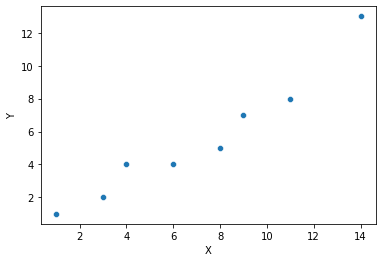

In [125]:
# Your code here.
sns.scatterplot(data['X'],data['Y'])

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

-1.4589041095890387


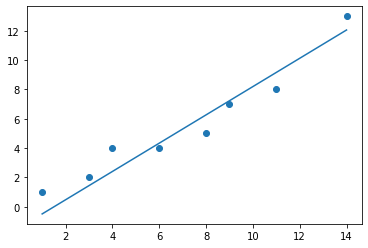

In [127]:
# Your response here. 
X2 = np.array(data['X']).reshape(-1, 1)
y = data['Y']
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.4, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_)
predictions = lm.predict(X2)
plt.scatter(X2,y)
plt.plot(X2,predictions)
#It looks that there is a relationship between the two variables

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

-0.397058823529413


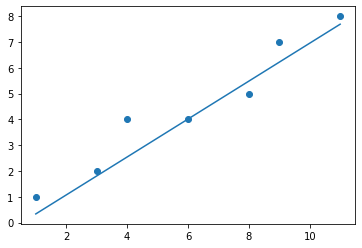

In [128]:
# Your response here. 
# The last point looks off the model.
data = data[data['X'] != 14]
X = np.array(data['X']).reshape(-1, 1)
y = data['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_)
predictions = lm.predict(X)
plt.scatter(X,y)
plt.plot(X,predictions)

#### What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [129]:
# Your response here. 
#The line became flatter. That means that there is a positive correlation and without the outlier it is more close to reality.

from sklearn import metrics
print('RMSE with outlier:', np.sqrt(metrics.mean_squared_error(X,lm.predict(X))))
print('RMSE without outlier:', np.sqrt(metrics.mean_squared_error(X2,lm.predict(X2))))

RMSE with outlier: 2.16844278064497
RMSE without outlier: 2.493720487246337
